# Decomposition

Decomposition involves removing the seasonality, trend, and residuals from a time series for further analysis.  You can predict the residuals and add(or multiply) to the trend and seasonality.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm                                                                                                                          
import statsmodels.formula.api as smf                                                                                                                 
import statsmodels.tsa.api as smt   

%matplotlib inline

/Users/michaelbeale/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Basics

Decomposition is usually additive or multiplicative. Below is a formula for how different types of decomposition models work (where _t_ is a point in time).

#### Additive

Value = Seasonality of _t_ + Trend of _t_ + Residual of _t_


#### Multiplicative

Value = Seasonality of _t_ × Trend of _t_ × Residual of _t_


## Additive vs Mutiplicative

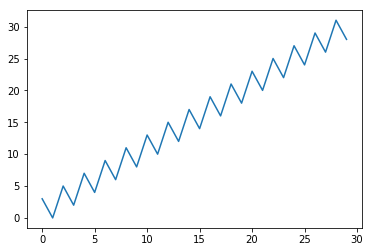

In [3]:
additive = [] 
for x in range(0, 30, 2):
    additive.append(x+3)
    additive.append(x)
x = [x for x in range(len(additive))]

plt.plot(x, additive)

If the magnitude of the seasonality is not increasing, an additive method should be used.  Here you can see the differences between the peaks and valleys remains relatively constant.

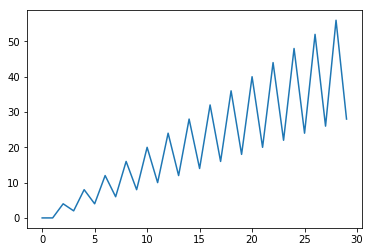

In [4]:
multiplicative = []
for x in range(0, 30, 2):
    multiplicative.append(x + x)
    multiplicative.append(x)
x = [x for x in range(len(additive))]

plt.plot(x, multiplicative)

In the above example the seasonality variance is increasing indicating that a multiplicative model would be more appropriate.

## Decomposing Models

### Classical Decomposition

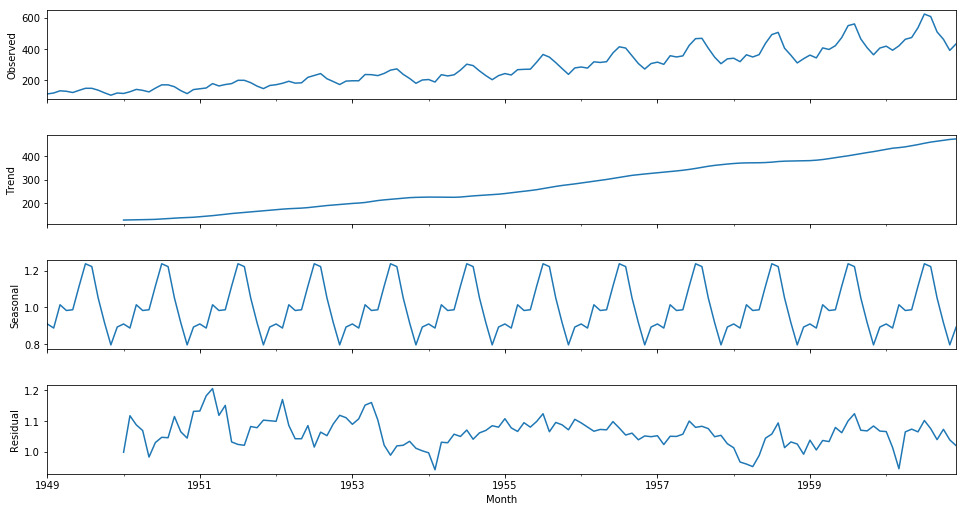

In [9]:
air = pd.read_csv('data/international-airline-passengers.csv', header=0, index_col=0, parse_dates=[0])

# seasonal_decompose() params
# freq defaults to 'air.index.inferred_freq' if pandas array but this needs to be an integer
#   for example - if you had 15 minute data and there was weekly seasonality freq=24*60/15*7
# filt defaults to is a symmetric moving average - https://ec.europa.eu/eurostat/sa-elearning/symmetric-trend-filter
# model defaults to additive, other option is multiplicative
# two_sided defaults to True - does it use a center fit or only for the past
d = smt.seasonal_decompose(air, model='multiplicative') #use multiplicative because the amplitude is increasing
fig = d.plot()
fig.set_size_inches(15,8)

* The trend estimate for the first 6 and last 6 of the measurements are unavialble because the two sided symmetric moving average for monthly data.  If `two_sided=False`, then the first 12 measurements would be unavailable.
* Classical decomposition only works if seasonality remains constant from year to year.  Typically only an issue with longer time series
* Classical decomposition is not robust enough to handle unusual data (outliers)

### X-12-ARIMA decomposition

* for monthly or quarterly data
* trend estimate is available for all points
* seasonal component is allowed to change slowly over time


In [10]:
# implementation coming soon

### STL decomposition

STL(Seasonal and Trend decomposition using Loess) has several advantages over the classical decomposition method and X-12-ARIMA:

* Unlike X-12-ARIMA, STL will handle any type of seasonality, not only monthly and quarterly data.
* The seasonal component is allowed to change over time, and the rate of change can be controlled by the user.
* The smoothness of the trend-cycle can also be controlled by the user.
* It can be robust to outliers (i.e., the user can specify a robust decomposition). So occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.
* Doesn't handle trading day or calendar variation
* Only for additive models, but you can take the logs of data for multiplicative

In [11]:
# implementaion coming soon.  No good python libraries for this ATM

## Using Decomposition for forecasting

In [1]:
# coming soon